# Summary



# Intro

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from biodata import *

/home/kimlab1/strokach/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from az_dream import functions as fn

In [4]:
from common import dat

In [5]:
%matplotlib inline

# Prepare input

In [6]:
subchallenge = 'ch2'

## d_1 / d_2 / c

In [7]:
GB_D = [
    ('az_dream_2015.ALL_TRAINING_DATA_GBD', 0),
    ('gex_gbd', 0), 
    ('gex_gbd_stitch', 0), 
    ('methyl_gbd', 0), 
    ('methyl_gbd_stitch', 0), 
    ('cnv_gbd', 1), 
    ('cnv_gbd_stitch', 1), 
    ('mutations_gbd', 1), 
    ('mutations_gbd_stitch', 1), 
    ('achilles_rnai_gbd', 1), 
    ('achilles_rnai_gbd_stitch', 1), 
    # Baseline network props
    ('ppi_full_vertex_gbd', 1), 
    ('string_full_vertex_gbd', 1), 
]

GB_D_2 = [
    # New
    #('cosmic_gdsc_en_input_gbd', 1),  # same data as _gbdc
    #('cosmic_gdsc_en_input_stitch_gbd', 1),  # same data as _gbdc
    ('cosmic_gdsc_en_output_gbd', 1),
    ('cosmic_gdsc_en_output_stitch_gbd', 1),

    ('cosmic_clp_cnv_gbd', 1),
    ('cosmic_clp_cnv_gbd_stitch', 1),
    ('cosmic_cnv_gbd', 1),
    ('cosmic_cnv_gbd_stitch', 1),
    ('cosmic_wgs_cnv_gbd', 1),
    ('cosmic_wgs_cnv_gbd_stitch', 1),
    
    ('cosmic_clp_mutations_gbd', 1),
    ('cosmic_clp_mutations_gbd_stitch', 1),
    ('cosmic_mutations_gbd', 1),
    ('cosmic_mutations_gbd_stitch', 1),
    ('cosmic_wgs_mutations_gbd', 1),
    ('cosmic_wgs_mutations_gbd_stitch', 1),

    ('cosmic_clp_gex_gbd', 0),
    ('cosmic_clp_gex_gbd_stitch', 0),
    ('cosmic_gex_gbd', 0),
    ('cosmic_gex_gbd_stitch', 0),
]

GB_DC = [
    ('az_dream_2015.ALL_TRAINING_DATA_GBDC', 0), 
    ('gex_gbdc', 0), 
    ('gex_gbdc_stitch', 0), 
    ('methyl_gbdc', 0), 
    ('methyl_gbdc_stitch', 0), 
    ('cnv_gbdc', 1), 
    ('cnv_gbdc_stitch', 1), 
    ('mutations_gbdc', 1), 
    ('mutations_gbdc_stitch', 1), 
    ('achilles_rnai_gbdc', 1), 
    ('achilles_rnai_gbdc_stitch', 1), 
    # Cell perturbed network props
    ('ppi_cnv_mut_vertex_gbdc', 1), 
    ('ppi_cnv_mut_vertex_gbdc_stitch', 1),
    ('ppi_gex_vertex_gbdc', 0), 
    ('ppi_gex_vertex_gbdc_stitch', 0),
]

GB_DC_2 = [
    # New
    ('cosmic_gdsc_en_input_gbdc', 1),
    ('cosmic_gdsc_en_input_stitch_gbdc', 1),

    ('cosmic_clp_cnv_gbdc', 1),
    ('cosmic_clp_cnv_gbdc_stitch', 1),
    ('cosmic_cnv_gbdc', 1),
    ('cosmic_cnv_gbdc_stitch', 1),
    ('cosmic_wgs_cnv_gbdc', 1),
    ('cosmic_wgs_cnv_gbdc_stitch', 1),

    ('cosmic_clp_mutations_gbdc', 1),
    ('cosmic_clp_mutations_gbdc_stitch', 1),
    ('cosmic_mutations_gbdc', 1),
    ('cosmic_mutations_gbdc_stitch', 1),
    ('cosmic_wgs_mutations_gbdc', 1),
    ('cosmic_wgs_mutations_gbdc_stitch', 1),

    ('cosmic_clp_gex_gbdc', 0),
    ('cosmic_clp_gex_gbdc_stitch', 0),
    #('cosmic_gex_gbdc', 0),
    #('cosmic_gex_gbdc_stitch', 0),
]

GB_C = [
    ('az_dream_2015.ALL_TRAINING_DATA_GBC', 0),
    ('gex_gbc', 0),
    ('methyl_gbc', 0),
    ('cnv_gbc', 1),
    ('mutations_gbc', 1), 
    ('achilles_rnai_gbc', 1), 
    ('cell_info_gbc', 1),
    # New
    ('cosmic_clp_cnv_gbc', 1),
    ('cosmic_cnv_gbc', 1),
    ('cosmic_wgs_cnv_gbc', 1),

    ('cosmic_clp_mutations_gbc', 1),
    ('cosmic_mutations_gbc', 1),
    ('cosmic_wgs_mutations_gbc', 1),

    ('cosmic_clp_gex_gbc', 0),
    #('cosmic_gex_gbc', 0),
]

GB_DD = [
    ('az_dream_2015.ALL_TRAINING_DATA_GBDD', 0), 
    ('drug_pair_info_gbdd', 1),
    ('clare_gbdd', 1),
    ('clare_gbdd_stitch', 1),
    # Gene sets
    ('gsea_subset_gbdd', 1),
    ('gsea_subset_gbdd_stitch', 1),
    # Baseline network props
    ('ppi_full_edge_gbdd', 1),
    ('ppi_full_all_edge_gbdd', 1),
    ('string_full_edge_gbdd', 1),
    ('string_full_all_edge_gbdd', 1),
    # New
    ('harmonizome_gbdd_balanced_pivot', 1),
    ('drug_pair_info_guessed_gbdd', 1),
    ('stitch_dd_network_gbdd', 1),
]

GB_DDC = [
    # Cell perturbed network props
    ('ppi_cnv_mut_edge_gbddc', 1), 
    ('ppi_cnv_mut_all_edge_gbddc', 1), 
    ('ppi_cnv_mut_edge_gbddc_stitch', 1),
    
    ('ppi_gex_edge_gbddc', 0), 
    ('ppi_gex_all_edge_gbddc', 0),
    ('ppi_gex_edge_gbddc_stitch', 0),
    # New
    
]

In [8]:
engine = sa.create_engine(os.environ[BIODB_CONNECTION_STR] + "/az_dream_2015_features")


def get_gbd(GB_D):
    features = []
    tables = []
    for whole_table_name, ch1b in GB_D:
        if subchallenge == 'ch1b' and not ch1b:
            continue
        table_name = whole_table_name.split('.')[-1]
        features.append('-- {}'.format(table_name))
        tables.append("LEFT JOIN {0} {1}_1 ON ({1}_1.d = a.d_1)".format(whole_table_name, table_name))
        tables.append("LEFT JOIN {0} {1}_2 ON ({1}_2.d = a.d_2)".format(whole_table_name, table_name))
        #
        df = pd.read_sql_query("select * from {} limit 0".format(whole_table_name), engine)
        for column in df.columns:
            if column in ['d', 'd_1', 'd_2', 'g', 'g_1', 'g_2', 'c']:
                continue
            features.append("({0}_1.{1} + {0}_2.{1}) / 2 {1}_mean".format(table_name, column))
            features.append("abs({0}_2.{1} - {0}_1.{1}) {1}_diff".format(table_name, column))
    return features, tables

            
def get_gbdc(GB_DC):
    features = []
    tables = []
    for whole_table_name, ch1b in GB_DC:
        if subchallenge == 'ch1b' and not ch1b:
            continue
        table_name = whole_table_name.split('.')[-1]
        features.append('-- {}'.format(table_name))
        tables.append(
            "LEFT JOIN {0} {1}_1 ON ({1}_1.d = a.d_1 AND {1}_1.c = a.c)".format(whole_table_name, table_name))
        tables.append(
            "LEFT JOIN {0} {1}_2 ON ({1}_2.d = a.d_2 AND {1}_2.c = a.c)".format(whole_table_name, table_name))
        #
        df = pd.read_sql_query("select * from {} limit 0".format(whole_table_name), engine)
        for column in df.columns:
            if column in ['d', 'g', 'c']:
                continue
            features.append("({0}_1.{1} + {0}_2.{1}) / 2 {1}_mean".format(table_name, column))
            features.append("abs({0}_2.{1} - {0}_1.{1}) {1}_diff".format(table_name, column))
    return features, tables


def get_gbc():
    features = []
    tables = []
    for whole_table_name, ch1b in GB_C:
        if subchallenge == 'ch1b' and not ch1b:
            continue
        table_name = whole_table_name.split('.')[-1]
        features.append('-- {}'.format(table_name))
        tables.append("LEFT JOIN {0} {1} USING (c)".format(whole_table_name, table_name))
        # features.append('{}.*'.format(table_name))
        # instead...
        df = pd.read_sql_query("select * from {} limit 0".format(whole_table_name), engine)
        for column in df.columns:
            if column in ['d', 'd_1', 'd_2', 'g', 'g_1', 'g_2', 'c']:
                continue
            features.append("{0}.{1} {1}".format(table_name, column))
    return features, tables


def get_gbdd():
    features = []
    tables = []
    for whole_table_name, ch1b in GB_DD:
        if subchallenge == 'ch1b' and not ch1b:
            continue
        table_name = whole_table_name.split('.')[-1]
        features.append('-- {}'.format(table_name))
        tables.append("LEFT JOIN {0} {1} USING (d_1, d_2)".format(whole_table_name, table_name))
        # features.append('{}.*'.format(table_name))
        # instead...
        df = pd.read_sql_query("select * from {} limit 0".format(whole_table_name), engine)
        for column in df.columns:
            if column in ['d', 'd_1', 'd_2', 'g', 'g_1', 'g_2', 'c']:
                continue
            features.append("{0}.{1} {1}".format(table_name, column))
    return features, tables
    

def get_gbddc():
    features = []
    tables = []
    for whole_table_name, ch1b in GB_DDC:
        if subchallenge == 'ch1b' and not ch1b:
            continue
        table_name = whole_table_name.split('.')[-1]
        features.append('-- {}'.format(table_name))
        tables.append("LEFT JOIN {0} {1} USING (d_1, d_2, c)".format(whole_table_name, table_name))
        # features.append('{}.*'.format(table_name))
        # instead...
        df = pd.read_sql_query("select * from {} limit 0".format(whole_table_name), engine)
        for column in df.columns:
            if column in ['d', 'd_1', 'd_2', 'g', 'g_1', 'g_2', 'c']:
                continue
            features.append("{0}.{1} {1}".format(table_name, column))
    return features, tables

In [9]:
temp_tables = []
sql_query = ""

if subchallenge == 'ch2':
    sql_query += """
    CREATE TEMPORARY TABLE gbd as (
    SELECT a.id,
    {features}
    FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY a
    {tables}
    );
    create index a on gbd (id);


    """.format(**{n: fn(v) for (n, fn, v) in zip(
        ['features', 'tables'], [lambda x: ",\n".join(x), lambda x: "\n".join(x)], get_gbd(GB_D))})
    temp_tables.append('gbd')
    
    sql_query += """
    CREATE TEMPORARY TABLE gbd2 as (
    SELECT a.id,
    {features}
    FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY a
    {tables}
    );
    create index a on gbd2 (id);


    """.format(**{n: fn(v) for (n, fn, v) in zip(
        ['features', 'tables'], [lambda x: ",\n".join(x), lambda x: "\n".join(x)], get_gbd(GB_D_2))})
    temp_tables.append('gbd2')

    
sql_query += """
CREATE TEMPORARY TABLE gbdc as (
SELECT a.id,
{features}
FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY a
{tables}
);
create index a on gbdc (id);


""".format(**{n: fn(v) for (n, fn, v) in zip(
    ['features', 'tables'], [lambda x: ",\n".join(x), lambda x: "\n".join(x)], get_gbdc(GB_DC))})
temp_tables.append('gbdc')


sql_query += """
CREATE TEMPORARY TABLE gbdc2 as (
SELECT a.id,
{features}
FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY a
{tables}
);
create index a on gbdc2 (id);


""".format(**{n: fn(v) for (n, fn, v) in zip(
    ['features', 'tables'], [lambda x: ",\n".join(x), lambda x: "\n".join(x)], get_gbdc(GB_DC_2))})
temp_tables.append('gbdc2')


sql_query += """
CREATE TEMPORARY TABLE gbc as (
SELECT a.id,
{features}
FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY a
{tables}
);
create index a on gbc (id);


""".format(**{n: fn(v) for (n, fn, v) in zip(
    ['features', 'tables'], [lambda x: ",\n".join(x), lambda x: "\n".join(x)], get_gbc())})
temp_tables.append('gbc')


if subchallenge == 'ch2':
    sql_query += """
    CREATE TEMPORARY TABLE gbdd as (
    SELECT a.id,
    {features}
    FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY a
    {tables}
    );
    create index a on gbdd (id);


    """.format(**{n: fn(v) for (n, fn, v) in zip(
        ['features', 'tables'], [lambda x: ",\n".join(x), lambda x: "\n".join(x)], get_gbdd())})
    temp_tables.append('gbdd')


sql_query += """
CREATE TEMPORARY TABLE gbddc as (
SELECT a.id,
{features}
FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY a
{tables}
);
create index a on gbddc (id);


""".format(**{n: fn(v) for (n, fn, v) in zip(
    ['features', 'tables'], [lambda x: ",\n".join(x), lambda x: "\n".join(x)], get_gbddc())})
temp_tables.append('gbddc')


sql_query += """
SELECT
a.*,
{features}
FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY a
{tables}
""".format(
    features=',\n'.join(['{}.*'.format(t) for t in temp_tables]),
    tables='\n'.join(['LEFT JOIN {} USING (id)'.format(t) for t in temp_tables])
)

with open('machine_learning/load_data.sql', 'wt') as ofh:
    ofh.write(sql_query)

In [10]:
engine = sa.create_engine(os.environ['BIODB_CONNECTION_STR'] + '/az_dream_2015_features')
subqueries = sql_query.strip(' ;').split(';')
for i, subquery in enumerate(subqueries[:-1]):
    print("Running subquery {}".format(i))
    engine.execute(subquery)
df = pd.read_sql_query(subqueries[-1], engine)

Running subquery 0
Running subquery 1
Running subquery 2
Running subquery 3
Running subquery 4
Running subquery 5
Running subquery 6
Running subquery 7
Running subquery 8
Running subquery 9
Running subquery 10
Running subquery 11
Running subquery 12
Running subquery 13


In [11]:
df_original = df.copy()

## Process

In [160]:
df = df_original.copy()

In [161]:
# Remove bad quality
QA_TYPE = 'allqa'

if QA_TYPE == 'allqa':
    pass
elif QA_TYPE == 'qa1':
    df = df[df['qa'] == 1]
elif QA_TYPE == 'allqa1':
    df.loc[df['qa'].isnull(), 'qa'] = 1
    df = df[df['qa'] == 1]
else:
    raise Exception

In [162]:
# Correct synergy scores
df.loc[df['synergy_score'] > 100, 'synergy_score'] = 100
df.loc[df['synergy_score'] < -100, 'synergy_score'] = -100

In [163]:
# Remove duplicate columns
seen = Counter()
keep_i = []
keep_name = []
for i, column in enumerate(df.columns):
    if column not in seen:
        seen.update([column])
        keep_i.append(i)
        keep_name.append(column)
    elif seen.get(column) == 1:
        print(column)
        seen.update([column])
        keep_i.append(i)
        keep_name.append(column + '_stitch')
    else:
        # Delete column
        print("\t", column)

df = df.iloc[:, keep_i]
df.columns = keep_name
df.head()

id
	 id
	 id
	 id
	 id
	 id
	 id


,id,c,d_1,d_2,synergy_score,qa,source,max_conc_mean,max_conc_diff,ic50_mean,...,ppi_gex_all_edge_similarity_jaccard_gbddc_min,ppi_gex_all_edge_similarity_jaccard_gbddc_avg,ppi_gex_all_edge_similarity_jaccard_gbddc_std,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_max,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_min,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_avg,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_std,ppi_gex_all_edge_gbddc_count,ppi_gex_weight_stitch_mean,ppi_gex_edge_betweenness_stitch_mean
0,1,BT-20,ADAM17,AKT,29.540390,1,train,38,74,5.319857,...,0.000000,0.007895,0.006832,0.473245,0.000000,0.202289,0.199209,3,NaN,NaN
1,2,CAL-120,ADAM17,AKT,4.401410,-1,train,38,74,0.591607,...,0.000000,0.007920,0.006829,0.462232,0.000000,0.198668,0.194205,6,NaN,NaN
2,3,CAL-51,ADAM17,AKT,0.315422,1,train,38,74,38.000000,...,0.007092,0.012475,0.005382,0.467724,0.133916,0.300820,0.166904,4,NaN,NaN
3,4,DU-4475,ADAM17,AKT,-41.734090,-1,train,38,74,37.660767,...,0.000000,0.007667,0.006609,0.461539,0.000000,0.198207,0.193968,3,NaN,NaN
4,5,HCC1143,ADAM17,AKT,35.532770,-1,train,38,74,0.699337,...,0.000000,0.007839,0.006840,0.467211,0.000000,0.200205,0.196500,3,NaN,NaN


In [164]:
try:
    df.drop(pd.Index(['id_stitch']), axis=1, inplace=True)
except Exception as e:
    print(e)

## Exclude for challenge 1b 

In [165]:
if subchallenge == 'ch1b':
    prefixes_to_exclude = [
        # 'max_conc_',  # allowed according to forum...
        'ic50_',
        'h_',
        'einf_'
    ]

    columns_to_drop = [c for c in df.columns if any(c.startswith(p) for p in prefixes_to_exclude)]
    print(columns_to_drop)

    df.drop(pd.Index(columns_to_drop), axis=1, inplace=True)

## Fill null values

In [166]:
df.shape

(39284, 1724)

In [167]:
# Remove columns with too many nulls
df_nulls = df.isnull().sum()
dat.print_full(df_nulls[df_nulls > 0])

synergy_score                                                       32624
qa                                                                  27709
max_conc_mean                                                       27709
max_conc_diff                                                       27709
ic50_mean                                                           27709
ic50_diff                                                           27709
h_mean                                                              27709
h_diff                                                              27709
einf_mean                                                           27709
einf_diff                                                           27709
methyl_probe_m_gbg_max_max_mean                                       972
methyl_probe_m_gbg_max_max_diff                                       972
methyl_probe_m_gbg_min_min_mean                                       972
methyl_probe_m_gbg_min_min_diff       

In [168]:
zero_columns = [
    'go_',
    'msigdb_',
    'f_',
    'cosmic_',
    'hzome_',
    # 'ppi_',
    # 'string_',
    'ppi_cnv_mut_weight_',
    'ppi_gex_weight_',
]

for c in df.columns:
    for prefix in zero_columns:
        if not c.startswith(prefix):
            continue
        df[c] = df[c].fillna(0)

In [169]:
if 'RDKFingerprint_Tanimoto' in df:
    df['missing_structure'] = (df['RDKFingerprint_Tanimoto'].isnull()).astype(int)
if 'ppi_full_edge_betweenness_gbdd_avg' in df:
    df['ppi_full_edge_betweenness_gbdd_missing'] = (df['ppi_full_edge_betweenness_gbdd_avg'].isnull()).astype(int)
if 'ppi_cnv_mut_edge_betweenness_gbddc_avg' in df:
    df['ppi_cnv_mut_edge_betweenness_gbddc_missing'] = (df['ppi_cnv_mut_edge_betweenness_gbddc_avg'].isnull()).astype(int)
if 'ppi_gex_edge_betweenness_gbddc_avg' in df:
    df['ppi_gex_edge_betweenness_gbddc_missing'] = (df['ppi_gex_edge_betweenness_gbddc_avg'].isnull()).astype(int)

In [170]:
df.head()

,id,c,d_1,d_2,synergy_score,qa,source,max_conc_mean,max_conc_diff,ic50_mean,...,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_min,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_avg,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_std,ppi_gex_all_edge_gbddc_count,ppi_gex_weight_stitch_mean,ppi_gex_edge_betweenness_stitch_mean,missing_structure,ppi_full_edge_betweenness_gbdd_missing,ppi_cnv_mut_edge_betweenness_gbddc_missing,ppi_gex_edge_betweenness_gbddc_missing
0,1,BT-20,ADAM17,AKT,29.540390,1,train,38,74,5.319857,...,0.000000,0.202289,0.199209,3,0,NaN,1,1,1,1
1,2,CAL-120,ADAM17,AKT,4.401410,-1,train,38,74,0.591607,...,0.000000,0.198668,0.194205,6,0,NaN,1,1,1,1
2,3,CAL-51,ADAM17,AKT,0.315422,1,train,38,74,38.000000,...,0.133916,0.300820,0.166904,4,0,NaN,1,1,1,1
3,4,DU-4475,ADAM17,AKT,-41.734090,-1,train,38,74,37.660767,...,0.000000,0.198207,0.193968,3,0,NaN,1,1,1,1
4,5,HCC1143,ADAM17,AKT,35.532770,-1,train,38,74,0.699337,...,0.000000,0.200205,0.196500,3,0,NaN,1,1,1,1


In [171]:
features_to_exclude = [
    'synergy_score', 'synergy_score_y', 'synergy_score_diff',
    'd_1', 'd_2', 'c', 'qa', 'source', 'unique_id',
    'index'
]

def get_feature_columns(df):
    feature_columns = [
        c for c in df.columns
        if (df[c].dtype in (int, float) and c not in features_to_exclude) or print(c)
    ]
    return feature_columns

In [172]:
feature_columns = get_feature_columns(df)

c
d_1
d_2
synergy_score
qa
source


## Make ddc features relative

In [173]:
if subchallenge == 'ch2':
    ppi_full_features = [c for c in feature_columns if c.startswith('ppi_full_')]
    ppi_cnv_mut_features = [c for c in feature_columns if c.startswith('ppi_cnv_mut_')]
    ppi_gex_features = [c for c in feature_columns if c.startswith('ppi_gex_')]
    
    print(
    [c for c in ppi_cnv_mut_features 
     if (c.replace('_cnv_mut_', '_full_').replace('_gbdc_', '_gbd_').replace('_gbddc_', '_gbdd_') not in feature_columns and
         'stitch' not in c)]
    )
    
    print(
    [c for c in ppi_gex_features 
     if (c.replace('_gex_', '_full_').replace('_gbdc_', '_gbd_').replace('_gbddc_', '_gbdd_') not in feature_columns and
         'stitch' not in c)]
    )
    
    for c in ppi_cnv_mut_features:
        if 'stitch' in c:
            # 'stitch' columns were created using csv2sql.g2d. They have no 'full' equivalent.
            continue
        c_ref = c.replace('_cnv_mut_', '_full_').replace('_gbdc_', '_gbd_').replace('_gbddc_', '_gbdd_')
        df[c] = df[c] - df[c_ref]
        
    for c in ppi_gex_features:
        if 'stitch' in c:
            # 'stitch' columns were created using csv2sql.g2d. They have no 'full' equivalent.
            continue
        c_ref = c.replace('_gex_', '_full_').replace('_gbdc_', '_gbd_').replace('_gbddc_', '_gbdd_')
        df[c] = df[c] - df[c_ref]

[]
[]


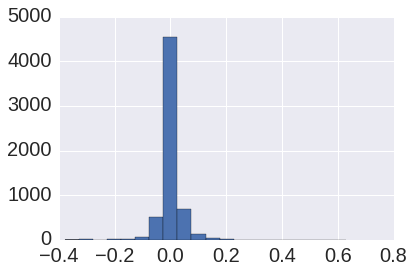

In [174]:
df['ppi_cnv_mut_edge_betweenness_gbddc_avg'].hist(bins=20)

## Transform

In [175]:
for c in feature_columns:
    x_norm = df[c].values
    x_min = np.min(x_norm)
    # x_sqrt, _ = np.sqrt(x_norm - x_min + 0.0001)
    x_sqrt = np.sqrt(x_norm - x_min)
    if (sp.stats.kstest(x_norm, 'norm')[0] < sp.stats.kstest(x_sqrt, 'norm')[0]):
        print("Taking sqrt of {}...".format(c))
        df[c] = x_sqrt

Taking sqrt of max_conc_gbd_mean_diff...
Taking sqrt of max_conc_gbd_std_diff...
Taking sqrt of ic50_gbd_min_mean...
Taking sqrt of ic50_gbd_mean_diff...
Taking sqrt of ic50_gbd_std_diff...
Taking sqrt of h_gbd_mean_diff...
Taking sqrt of h_gbd_std_diff...
Taking sqrt of gex_gbg_max_max_diff...
Taking sqrt of gex_gbg_min_min_diff...
Taking sqrt of gex_gbg_mean_mean_diff...
Taking sqrt of gex_gbg_std_mean_diff...
Taking sqrt of gex_gbg_min_stitch_min_diff...
Taking sqrt of gex_gbg_mean_stitch_mean_diff...
Taking sqrt of gex_gbg_std_stitch_mean_diff...
Taking sqrt of zygosity_2_gbg_mean_mean...
Taking sqrt of disruption_status_gbg_max_stitch_max_mean...
Taking sqrt of zygosity_2_gbg_stitch_mean_mean...
Taking sqrt of ppi_full_vertex_betweenness_gbd_max_diff...
Taking sqrt of ppi_full_vertex_betweenness_gbd_min_diff...
Taking sqrt of ppi_full_vertex_betweenness_gbd_avg_diff...
Taking sqrt of ppi_full_vertex_clustering_coef_gbd_max_mean...
Taking sqrt of ppi_full_vertex_clustering_coef_gbd

## Impute

In [176]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

values_imputed = imputer.fit_transform(df[feature_columns].values)

In [177]:
df_imputed = pd.DataFrame(values_imputed, columns=feature_columns, index=df.index.copy())

id_columns = ['d_1', 'd_2', 'c', 'qa', 'synergy_score', 'source']
for c in id_columns:
    df_imputed[c] = df[c]
    
df_imputed = df_imputed.reindex_axis(id_columns + feature_columns, axis=1)

df_imputed.head()

,d_1,d_2,c,qa,synergy_score,source,id,max_conc_mean,max_conc_diff,ic50_mean,...,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_min,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_avg,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_std,ppi_gex_all_edge_gbddc_count,ppi_gex_weight_stitch_mean,ppi_gex_edge_betweenness_stitch_mean,missing_structure,ppi_full_edge_betweenness_gbdd_missing,ppi_cnv_mut_edge_betweenness_gbddc_missing,ppi_gex_edge_betweenness_gbddc_missing
0,ADAM17,AKT,BT-20,1,29.540390,train,1,38,74,5.319857,...,0.000000,0.007126,0.008191,0,0,3.121167,1,1,0,0
1,ADAM17,AKT,CAL-120,-1,4.401410,train,2,38,74,0.591607,...,0.000000,0.003505,0.003186,3,0,3.121167,1,1,0,0
2,ADAM17,AKT,CAL-51,1,0.315422,train,3,38,74,38.000000,...,0.133916,0.105657,-0.024114,1,0,3.121167,1,1,0,0
3,ADAM17,AKT,DU-4475,-1,-41.734090,train,4,38,74,37.660767,...,0.000000,0.003043,0.002950,0,0,3.121167,1,1,0,0
4,ADAM17,AKT,HCC1143,-1,35.532770,train,5,38,74,0.699337,...,0.000000,0.005041,0.005482,0,0,3.121167,1,1,0,0


## Remove zero variance

In [178]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
values = selector.fit(df_imputed[feature_columns].values)
feature_columns_to_drop = set(feature_columns) - set(np.array(feature_columns)[selector.get_support(indices=True)])

In [179]:
feature_columns_to_drop

{'cosmic_clp_cnv_count_gbgc_mean_diff',
 'cosmic_clp_cnv_mut_type_gain_gbgc_mean_mean_diff',
 'cosmic_clp_cnv_mut_type_loss_gbgc_mean_mean_diff',
 'cosmic_clp_cnv_mut_type_loss_gbgc_mean_mean_mean',
 'cosmic_clp_gex_count_gbg_mean_diff',
 'cosmic_clp_gex_count_gbg_stitch_mean_diff',
 'cosmic_clp_gex_count_gbg_stitch_mean_mean',
 'cosmic_clp_gex_count_gbgc_mean_diff',
 'cosmic_clp_gex_count_gbgc_stitch_mean_diff',
 'cosmic_clp_gex_regulation_over_gbc_min',
 'cosmic_clp_gex_regulation_over_gbg_max_max_diff',
 'cosmic_clp_gex_regulation_over_gbg_max_stitch_max_diff',
 'cosmic_clp_gex_regulation_over_gbg_max_stitch_max_mean',
 'cosmic_clp_gex_regulation_over_gbg_min_min_diff',
 'cosmic_clp_gex_regulation_over_gbg_min_min_mean',
 'cosmic_clp_gex_regulation_over_gbg_min_stitch_min_diff',
 'cosmic_clp_gex_regulation_over_gbg_min_stitch_min_mean',
 'cosmic_clp_gex_regulation_over_gbgc_std_mean_diff',
 'cosmic_clp_gex_regulation_over_gbgc_std_mean_mean',
 'cosmic_clp_gex_regulation_over_gbgc_st

In [180]:
df_imputed.drop(pd.Index(list(feature_columns_to_drop)), axis=1, inplace=True)

In [181]:
feature_columns = [c for c in feature_columns if c not in feature_columns_to_drop]

## Standardize

In [182]:
from sklearn.preprocessing import scale, robust_scale, maxabs_scale

In [183]:
values_scaled = robust_scale(df_imputed[feature_columns].values)
values_scaled = maxabs_scale(values_scaled)

In [184]:
df_scaled = pd.DataFrame(values_scaled, columns=feature_columns, index=df.index.copy())

id_columns = ['d_1', 'd_2', 'c', 'qa', 'synergy_score', 'source']
for c in id_columns:
    df_scaled[c] = df[c]
    
df_scaled = df_scaled.reindex_axis(id_columns + feature_columns, axis=1)

df_scaled.head()

,d_1,d_2,c,qa,synergy_score,source,id,max_conc_mean,max_conc_diff,ic50_mean,...,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_min,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_avg,ppi_gex_all_edge_similarity_inverse_log_weighted_gbddc_std,ppi_gex_all_edge_gbddc_count,ppi_gex_weight_stitch_mean,ppi_gex_edge_betweenness_stitch_mean,missing_structure,ppi_full_edge_betweenness_gbdd_missing,ppi_cnv_mut_edge_betweenness_gbddc_missing,ppi_gex_edge_betweenness_gbddc_missing
0,ADAM17,AKT,BT-20,1,29.540390,train,-1.000000,1,1,0.126822,...,0.000000,0.000121,0.000541,0.000000,-0.276677,0,1,0,0,0
1,ADAM17,AKT,CAL-120,-1,4.401410,train,-0.999949,1,1,0.000488,...,0.000000,-0.000064,0.000210,0.013043,-0.276677,0,1,0,0,0
2,ADAM17,AKT,CAL-51,1,0.315422,train,-0.999898,1,1,1.000000,...,0.004513,0.005166,-0.001593,0.004348,-0.276677,0,1,0,0,0
3,ADAM17,AKT,DU-4475,-1,-41.734090,train,-0.999847,1,1,0.990936,...,0.000000,-0.000088,0.000195,0.000000,-0.276677,0,1,0,0,0
4,ADAM17,AKT,HCC1143,-1,35.532770,train,-0.999796,1,1,0.003367,...,0.000000,0.000015,0.000362,0.000000,-0.276677,0,1,0,0,0


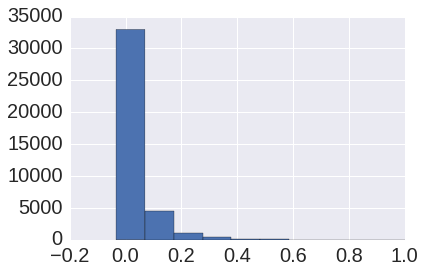

In [185]:
df_scaled['achilles_rnai_gs_gbgc_stitch_mean_diff'].hist()

## PCA

In [186]:
from sklearn.decomposition import PCA

In [187]:
pca = PCA()

values_pca = pca.fit_transform(df_scaled[feature_columns].values)

(0, 50)

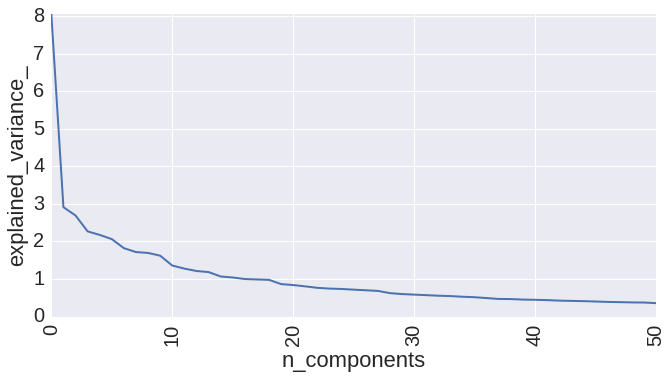

In [188]:
plt.figure(1, figsize=(12, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.xticks(rotation='vertical')
plt.xlim(0, 50)

In [189]:
df_pca = pd.DataFrame(values_pca, columns=list(range(values_pca.shape[1])), index=df.index.copy())

id_columns = ['d_1', 'd_2', 'c', 'qa', 'synergy_score', 'source']
for c in id_columns:
    df_pca[c] = df[c]
    
df_pca = df_pca.reindex_axis(id_columns + list(range(values_pca.shape[1])), axis=1)

df_pca.head()

,d_1,d_2,c,qa,synergy_score,source,0,1,2,3,...,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643
0,ADAM17,AKT,BT-20,1,29.540390,train,-4.572418,-1.115158,2.022647,-0.334277,...,-1.624847e-16,2.664632e-16,-2.530518e-17,7.068332e-17,3.098283e-16,-1.066365e-16,3.409617e-17,1.389802e-17,-7.969944e-19,5.670639e-19
1,ADAM17,AKT,CAL-120,-1,4.401410,train,-4.308461,-1.018251,2.098866,0.107489,...,1.982399e-16,-3.023252e-16,-1.281522e-16,9.356262e-17,-9.517570e-17,9.283599e-17,-7.193339e-17,-9.020401e-17,-1.843461e-17,-3.844127e-18
2,ADAM17,AKT,CAL-51,1,0.315422,train,-4.514661,-1.195903,1.828676,-2.813826,...,-1.392573e-17,3.831082e-16,2.765331e-16,2.770733e-16,2.246244e-16,-1.403293e-17,2.590416e-18,-1.378365e-16,-4.263254e-17,-2.966134e-18
3,ADAM17,AKT,DU-4475,-1,-41.734090,train,-4.460677,-1.049183,1.856229,-2.663703,...,-1.899297e-16,6.336140e-17,1.971088e-16,-1.114363e-17,-1.628756e-16,1.079809e-16,6.844610e-17,1.181996e-16,5.349672e-17,1.826523e-18
4,ADAM17,AKT,HCC1143,-1,35.532770,train,-4.610915,-1.219486,2.169694,2.085159,...,-1.199627e-16,1.325587e-17,-1.876629e-16,-3.135588e-17,-2.008249e-16,5.297031e-17,-4.929831e-18,-6.132371e-17,-1.955659e-17,1.377900e-17


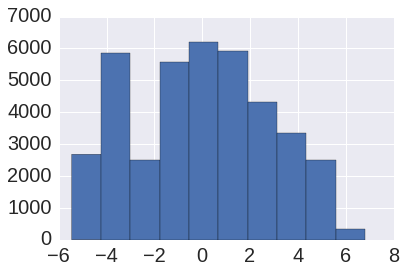

In [190]:
df_pca[0].hist()

In [191]:
df_pca.shape

(39284, 1650)

In [192]:
tmp = df_pca[df_pca['synergy_score'].notnull()]

results = []
for i in range(values_pca.shape[1]):
    results.append(sp.stats.pearsonr(tmp[i], tmp['synergy_score']))
    
results_df = pd.DataFrame(results, columns=['corr', 'pvalue'])
#results_df = results_df[results_df['pvalue'] < 0.001]
results_df['corr_abs'] = results_df['corr'].abs()
results_df.reset_index(inplace=True)
print(len(results_df))

1644


In [193]:
results_df.head()

,index,corr,pvalue,corr_abs
0,0,0.054770,7.741670e-06,0.054770
1,1,0.000246,9.839557e-01,0.000246
2,2,-0.008988,4.633456e-01,0.008988
3,3,0.068511,2.185672e-08,0.068511
4,4,-0.023694,5.316638e-02,0.023694


(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.]), <a list of 10 Text xticklabel objects>)

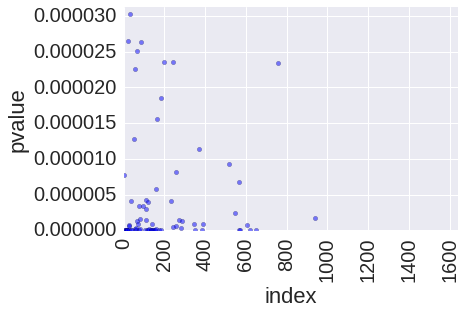

In [208]:
plt.scatter(results_df['index'], (results_df['pvalue']), alpha=0.5)
plt.ylim(0, 0.05 / 1600)
plt.xlim(results_df['index'].values[0], results_df['index'].values[-1])
plt.xlabel('index')
plt.ylabel('pvalue')
plt.xticks(rotation=90)

## Scale

In [195]:
from sklearn.preprocessing import scale, maxabs_scale

In [196]:
values_pca_scaled = scale(df_pca[list(range(values_pca.shape[1]))].values)
values_pca_scaled = maxabs_scale(values_pca_scaled)

In [197]:
df_pca_scaled = pd.DataFrame(
    values_pca_scaled, columns=list(range(values_pca_scaled.shape[1])), index=df.index.copy())

id_columns = ['d_1', 'd_2', 'c', 'qa', 'synergy_score', 'source']
for c in id_columns:
    df_pca_scaled[c] = df[c]
    
df_pca_scaled = df_pca_scaled.reindex_axis(id_columns + list(range(values_pca_scaled.shape[1])), axis=1)

df_pca_scaled.head()

,d_1,d_2,c,qa,synergy_score,source,0,1,2,3,...,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643
0,ADAM17,AKT,BT-20,1,29.540390,train,-0.671038,-0.204332,0.347951,-0.072525,...,-0.022552,0.051457,-0.004880,0.014291,0.143869,-0.084534,0.014361,0.009499,-0.001425,0.003233
1,ADAM17,AKT,CAL-120,-1,4.401410,train,-0.632300,-0.186575,0.361062,0.023321,...,0.027669,-0.058786,-0.025031,0.018929,-0.044490,0.074143,-0.030710,-0.059328,-0.032298,-0.022956
2,ADAM17,AKT,CAL-51,1,0.315422,train,-0.662562,-0.219127,0.314582,-0.610492,...,-0.001869,0.074065,0.054262,0.056128,0.104242,-0.010870,0.000969,-0.090821,-0.074653,-0.017744
3,ADAM17,AKT,DU-4475,-1,-41.734090,train,-0.654639,-0.192243,0.319322,-0.577921,...,-0.026373,0.012091,0.038700,-0.002296,-0.075976,0.086191,0.028963,0.078459,0.093609,0.010711
4,ADAM17,AKT,HCC1143,-1,35.532770,train,-0.676688,-0.223448,0.373247,0.452399,...,-0.016632,0.002380,-0.036692,-0.006394,-0.093625,0.042430,-0.002228,-0.040234,-0.034262,0.081674


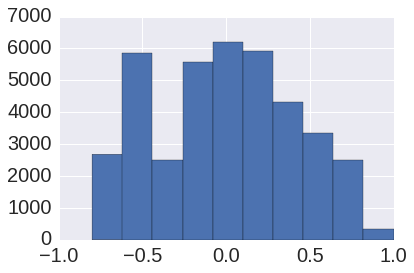

In [198]:
df_pca_scaled[0].hist()

In [212]:
df_pca_scaled.shape

(39284, 1650)

# Save

In [199]:
df_imputed.to_hdf(
    'machine_learning/ddc_data_{}_imputed_sqrt_{}.h5'.format(subchallenge, QA_TYPE),
    'ddc_data', mode='w', complevel=9, complib='blosc')

In [200]:
df_scaled.to_hdf(
    'machine_learning/ddc_data_{}_scaled_sqrt_{}.h5'.format(subchallenge, QA_TYPE),
    'ddc_data', mode='w', complevel=9, complib='blosc')

In [201]:
df_pca.to_hdf(
    'machine_learning/ddc_data_{}_pca_sqrt_{}.h5'.format(subchallenge, QA_TYPE),
    'ddc_data', mode='w', complevel=9, complib='blosc')

/home/kimlab1/strokach/anaconda3/lib/python3.5/site-packages/pandas/io/pytables.py:257: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
/home/kimlab1/strokach/anaconda3/lib/python3.5/site-packages/pandas/io/pytables.py:257: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_items] [items->None]

  f(store)


In [202]:
df_pca_scaled.to_hdf(
    'machine_learning/ddc_data_{}_pca_scaled_sqrt_{}.h5'.format(subchallenge, QA_TYPE),
    'ddc_data', mode='w', complevel=9, complib='blosc')

/home/kimlab1/strokach/anaconda3/lib/python3.5/site-packages/pandas/io/pytables.py:257: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
/home/kimlab1/strokach/anaconda3/lib/python3.5/site-packages/pandas/io/pytables.py:257: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_items] [items->None]

  f(store)


In [203]:
engine = sa.create_engine(os.environ[BIODB_CONNECTION_STR] + "/az_dream_2015_features")

if subchallenge.startswith('ch1'):
    if subchallenge == 'ch1a':
        sql_query = """\
        SELECT *
        FROM az_dream_2015_features.cell_info_gbcc
        JOIN az_dream_2015_features.cnv_gbcc USING (c_x, c_y)
        JOIN az_dream_2015_features.gex_gbcc USING (c_x, c_y)
        JOIN az_dream_2015_features.methyl_gbcc USING (c_x, c_y)
        JOIN az_dream_2015_features.mutations_gbcc USING (c_x, c_y)
        JOIN az_dream_2015_features.achilles_rnai_gbcc USING (c_x, c_y)

#         # NEW
#         JOIN az_dream_2015_features.cosmic_clp_mutations_gbcc USING (c_x, c_y)
#         JOIN az_dream_2015_features.cosmic_mutations_gbcc USING (c_x, c_y)
#         JOIN az_dream_2015_features.cosmic_wgs_mutations_gbcc USING (c_x, c_y)

#         JOIN az_dream_2015_features.cosmic_clp_gex_gbcc USING (c_x, c_y)
#         # JOIN az_dream_2015_features.cosmic_gex_gbcc USING (c_x, c_y)
        """
    elif subchallenge == 'ch1b':
        sql_query = """\
        SELECT *
        FROM az_dream_2015_features.cell_info_gbcc
        JOIN az_dream_2015_features.cnv_gbcc USING (c_x, c_y)
        # JOIN az_dream_2015_features.gex_gbcc USING (c_x, c_y)
        # JOIN az_dream_2015_features.methyl_gbcc USING (c_x, c_y)
        JOIN az_dream_2015_features.mutations_gbcc USING (c_x, c_y)
        JOIN az_dream_2015_features.achilles_rnai_gbcc USING (c_x, c_y)

#         # NEW
#         JOIN az_dream_2015_features.cosmic_clp_mutations_gbcc USING (c_x, c_y)
#         JOIN az_dream_2015_features.cosmic_mutations_gbcc USING (c_x, c_y)
#         JOIN az_dream_2015_features.cosmic_wgs_mutations_gbcc USING (c_x, c_y)

#         # JOIN az_dream_2015_features.cosmic_clp_gex_gbcc USING (c_x, c_y)
#         # JOIN az_dream_2015_features.cosmic_gex_gbcc USING (c_x, c_y)
        """ 
    else:
        raise Exception
    pairwise_data = pd.read_sql_query(sql_query, engine)
    display(pairwise_data.head())
    pairwise_data.to_hdf('machine_learning/pairwise_data_{}.h5'.format(subchallenge), 'pairwise_data')